In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('apple_stock_prepared.csv')
df

,volume,close_lag1,close_lag2,close_lag3,close_lag4,close_lag5,close_lag6,ma_3,rsi_3,ma_6,rsi_6,ma_9,rsi_9,ma_12,rsi_12,event,close
0,-0.464011,-0.767950,-0.747017,-0.739101,-0.639217,-0.669514,-0.646494,0.627785,-1.812133,4.368171,-1.830292,7.716514,-1.862736,8.506598,-1.880503,-0.456953,2.338571
1,-0.190969,-0.769480,-0.758587,-0.738967,-0.732728,-0.632766,-0.662760,-0.579982,-1.183392,1.505926,-1.592107,3.501353,-1.710687,5.255354,-1.767605,-0.456953,2.945714
2,-0.723175,-0.760056,-0.760125,-0.750631,-0.732592,-0.727153,-0.625758,-0.115027,-1.286573,0.152772,-1.626297,2.429129,-1.732050,4.553852,-1.782792,-0.456953,2.750000
3,-0.570132,-0.763094,-0.750650,-0.752182,-0.744357,-0.727016,-0.720797,-0.092085,-0.982726,-0.217920,-1.529132,1.347659,-1.674853,2.875177,-1.742103,-0.456953,2.941429
4,-0.692599,-0.760123,-0.753705,-0.742630,-0.745922,-0.738891,-0.720659,-0.694639,-0.034087,-0.992704,-1.141034,-0.009939,-1.444629,1.005462,-1.579137,-0.456953,3.678571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,-0.793550,1.604636,1.763441,1.671463,1.504886,1.711946,1.630468,-0.223795,0.546643,-0.331446,0.673720,-0.357578,0.629509,-0.408869,0.485557,-0.456953,172.500000
192,-0.918149,1.871598,1.626894,1.791975,1.698640,1.531433,1.735137,-0.123015,0.374026,-0.224093,0.567415,-0.253361,0.557737,-0.309700,0.438452,-0.456953,171.050000
193,-1.143272,1.849092,1.895306,1.654314,1.820192,1.727003,1.553377,-0.050645,0.580333,-0.185932,0.686190,-0.255568,0.650124,-0.289776,0.511566,-0.456953,175.000000
194,-0.646054,1.910400,1.872678,1.924917,1.681343,1.849694,1.750297,0.248055,-0.952595,0.233958,-0.332910,0.084071,-0.061402,-0.031482,0.031806,-0.456953,160.500000


In [3]:
X = df[df.columns[0:-1]]
y = df[df.columns[-1]]

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import random
random.seed(100)

In [6]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=100)

In [7]:
X_val,X_test, y_val,y_test = train_test_split(X_test,y_test,test_size = 0.5, random_state=100)

In [8]:
X_train.shape

(156, 16)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import RMSprop


In [10]:
def stock_prediction(X_train):
    stock_predictor = Sequential()
    stock_predictor.add(Dense(10, input_dim=X_train.shape[1],
                    activation ='relu',
                    kernel_initializer='he_normal'))
    stock_predictor.add(Dense(6, input_dim=10,
                    activation ='relu',
                    kernel_initializer='he_normal'))
    stock_predictor.add(Dense(3, input_dim=6,
                activation ='relu',
                kernel_initializer='he_normal'))
    stock_predictor.add(Dense(1, activation ='relu',
                kernel_initializer='he_normal'))
    stock_predictor.compile(loss='mean_squared_error',
                           optimizer ='rmsprop',
                           metrics = ['mape'])
    return stock_predictor

In [11]:
model = stock_prediction(X_train)

In [12]:
model

<Sequential name=sequential, built=True>

In [13]:
# Visualise the keras model using pydot:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261 (1.02 KB)

 Trainable params: 261 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Train the model using basic parameters:
def num_steps(length: int, batch_size: int):
    return length//batch_size + 1

In [15]:
batch_size = 20
num_steps(len(X_train), batch_size)

8

In [16]:
history = model.fit(X_train, y_train, validation_data = [X_val,y_val],
                   batch_size = batch_size, epochs=1000, verbose =1)

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5795.3936 - mape: 98.2802 - val_loss: 24436.3926 - val_mape: 99.2027
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4393.9092 - mape: 98.0272 - val_loss: 24419.9414 - val_mape: 98.9428
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3971.2515 - mape: 96.8545 - val_loss: 24406.4004 - val_mape: 98.6790
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5376.2949 - mape: 97.3073 - val_loss: 24391.7090 - val_mape: 98.3607
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4796.9023 - mape: 96.4562 - val_loss: 24374.3906 - val_mape: 97.9952
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4633.1621 - mape: 96.0497 - val_loss: 24357.1113 - val_mape: 97.6235
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4338.3164 - mape: 95.1236 - val_loss: 24338.0996 - val_mape: 97.2373
Epoch 8/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3797.8118 - mape: 94.8110 - val_loss: 24315.3809 - va

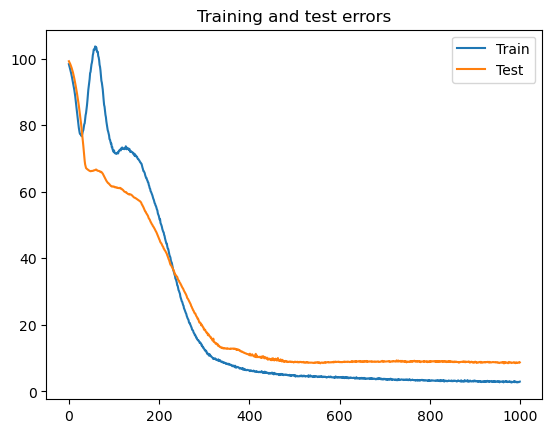

In [17]:
plt.plot(history.history['mape'], label='Train')
plt.plot(history.history['val_mape'], label='Test')
plt.legend()
plt.title('Training and test errors')
plt.show()